In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
class TransportationProblem(object):
    def __init__(self, n):
        self.n = n
    
    def initialState(self):
        return 1
    
    def isEnd(self, state):
        return state == self.n
    
    def actions(self, state):
        moves = []
        if state + 1 <= self.n:
            moves.append('walk')
        if state * 2 <= self.n:
            moves.append('tram')
        return moves
    
    def cost(self, action):
        if action == 'walk':
            return -1
        if action == 'tram':
            return -2
    
    def successor(self, state, action):
        if action == 'walk':
            return state + 1
        if action == 'tram':
            return state * 2

In [3]:
problem = TransportationProblem(n=6)

### Evaluación de Politicas ###

In [144]:
def policy_evaluation(problem, policy, gamma):
    exp_values= np.zeros(problem.n)
    max_iterations = 1000
    convergence = 10**(-6)
    for _ in range(max_iterations):
        new_exp_values = np.zeros(problem.n)
        actual_state = problem.initialState()
        for _ in range(problem.n):
            reward, state, future_states, prob = policy(problem, actual_state)
            total_sum = 0
            i=0
            for future_state in future_states:
                total_sum += prob[i] * (reward + gamma * exp_values[future_state-1])
                i+=1
            new_exp_values[state-1]+=total_sum
            actual_state = actual_state+1
            if problem.isEnd(actual_state):
                break
        if np.max(np.abs(new_exp_values-exp_values))<=convergence:
            return new_exp_values
        else:
            exp_values = new_exp_values.copy()
    return exp_values

### Politicas ###

In [125]:
def walk_tram(problem, state):
    if state < 3:
        return problem.cost('walk'), state, [state+1], [1]
    if state == 3:
        return problem.cost('tram'), state, [state*2, state], [0.5, 0.5]
    if state >3:
        return 0, 0, [0, 0], [0, 0]


def just_walk(problem, state):
    return problem.cost('walk'), state, [state+1], [1]

Se definen las funciones que resultan de resolver analiticamente el sistema de ecuaciones de cada politica

In [126]:
#Resultados Analiticos
def expected_value_justwalk(gamma):
    return -(1+gamma+gamma**2+gamma**3+gamma**4)

def expected_value_walktram(gamma):
    return (4*gamma**2)/(gamma-2)-gamma-1

Comparacion para distintos valores $gamma: [1/5, 1/4, 1/2, 3/4, 1]$ para la politica de Walk and Tram

In [145]:
gamma=0
print(expected_value_walktram(gamma))
print(policy_evaluation(problem, walk_tram, gamma)[0])

-1.0
-1.0


In [146]:
gamma=1/5
print(expected_value_walktram(gamma))
print(policy_evaluation(problem, walk_tram, gamma)[0])

-1.288888888888889
-1.2888888


In [148]:
gamma=1/4
print(expected_value_walktram(gamma))
print(policy_evaluation(problem, walk_tram, gamma)[0])

-1.3928571428571428
-1.3928570747375488


In [111]:
gamma=1/2
print(expected_value_walktram(gamma))
print(policy_evaluation(problem, walk_tram, gamma)[0])

-2.1666666666666665
-2.1666665077209473


In [112]:
gamma=3/4
print(expected_value_walktram(gamma))
print(policy_evaluation(problem, walk_tram, gamma)[0])

-3.55
-3.549999724721186


In [113]:
gamma=1
print(expected_value_walktram(gamma))
print(policy_evaluation(problem, walk_tram, gamma)[0])

-6.0
-5.999999046325684


In [64]:
gamma = np.linspace(0, 1, 100)

analitic_justwalk=expected_value_justwalk(gamma)
analitic_walktram=expected_value_walktram(gamma)

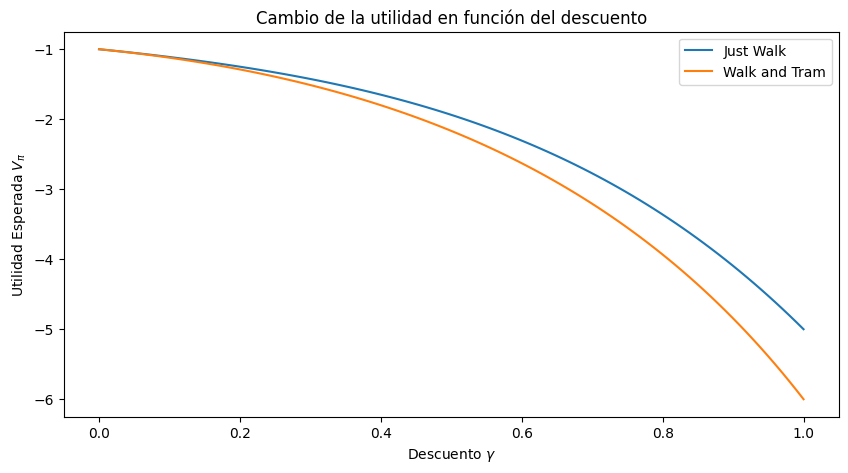

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(gamma, analitic_justwalk,label = 'Just Walk')
plt.plot(gamma, analitic_walktram,label = 'Walk and Tram')
plt.xlabel('Descuento $\gamma$')
plt.ylabel('Utilidad Esperada $V_{\pi}$')
plt.title('Cambio de la utilidad en función del descuento')
plt.legend()
plt.show()

In [15]:
just_walk_aprox = [policy_evaluation(problem, just_walk, g)[0] for g in gamma]
walk_tram_aprox = [policy_evaluation(problem, walk_tram, g)[0] for g in gamma]

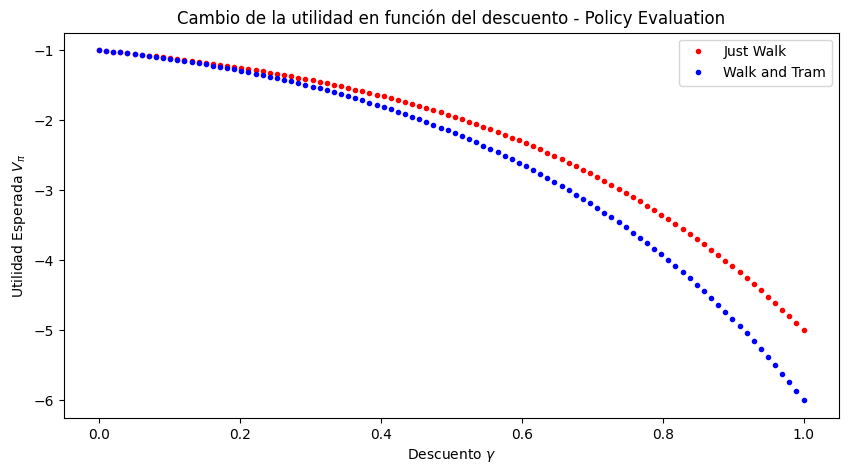

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(gamma, just_walk_aprox, '.r' , label = 'Just Walk')
plt.plot(gamma, walk_tram_aprox, '.b' ,label = 'Walk and Tram')
plt.xlabel('Descuento $\gamma$')
plt.ylabel('Utilidad Esperada $V_{\pi}$')
plt.title('Cambio de la utilidad en función del descuento - Policy Evaluation')
plt.legend()
plt.show()

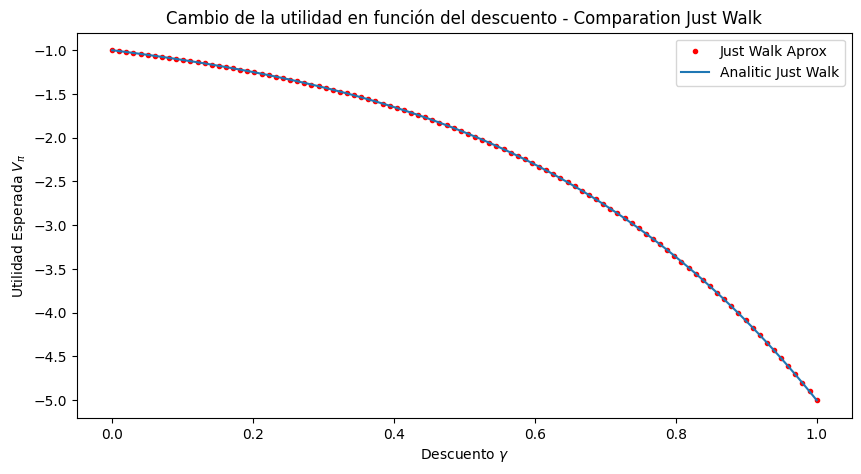

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(gamma, just_walk_aprox, '.r' , label = 'Just Walk Aprox')
plt.plot(gamma, analitic_justwalk,label = 'Analitic Just Walk')
plt.xlabel('Descuento $\gamma$')
plt.ylabel('Utilidad Esperada $V_{\pi}$')
plt.title('Cambio de la utilidad en función del descuento - Comparation Just Walk')
plt.legend()
plt.show()

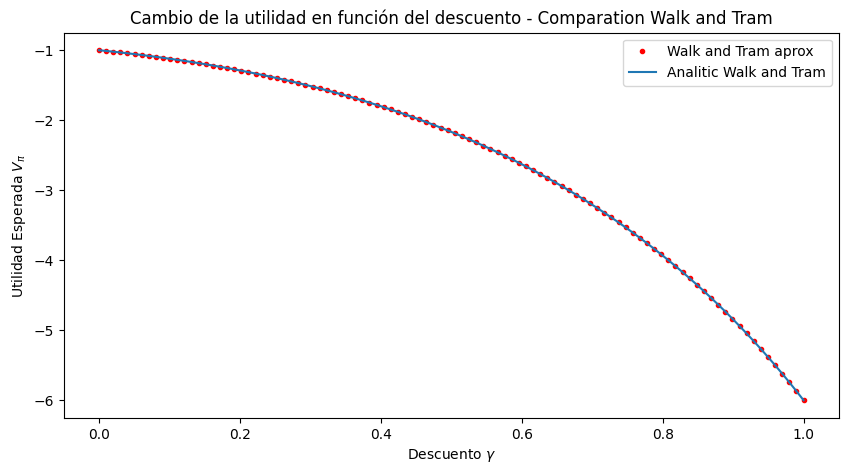

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(gamma, walk_tram_aprox, '.r' , label = 'Walk and Tram aprox')
plt.plot(gamma, analitic_walktram,label = 'Analitic Walk and Tram')
plt.xlabel('Descuento $\gamma$')
plt.ylabel('Utilidad Esperada $V_{\pi}$')
plt.title('Cambio de la utilidad en función del descuento - Comparation Walk and Tram')
plt.legend()
plt.show()

### Juego del Dado ###

In [19]:
class DiceGame(object):
    def __init__(self, n):
        self.n = 2
    
    def initialState(self):
        return 1
    
    def isEnd(self, state):
        return state == 2


In [20]:
game = DiceGame(1)

In [21]:
def just_continue(game, state):
    return 4, state, [state+1, state], [1/3, 2/3]

In [22]:
def expected_value_justcontinue(gamma):
    return 12/(3-2*gamma)

In [23]:
gamma = 0
print(expected_value_justcontinue(gamma))
print(policy_evaluation(game, just_continue, gamma)[0])

4.0
4.0


In [24]:
gamma = 1/5
print(expected_value_justcontinue(gamma))
print(policy_evaluation(game, just_continue, gamma)[0])

4.615384615384615
4.615384553915561


In [25]:
gamma = 1/4
print(expected_value_justcontinue(gamma))
print(policy_evaluation(game, just_continue, gamma)[0])

4.8
4.799999920616775


In [26]:
gamma = 1/2
print(expected_value_justcontinue(gamma))
print(policy_evaluation(game, just_continue, gamma)[0])

6.0
5.999999581849683


In [27]:
gamma = 3/4
print(expected_value_justcontinue(gamma))
print(policy_evaluation(game, just_continue, gamma)[0])

8.0
7.999999046325683


In [28]:
gamma = 1
print(expected_value_justcontinue(gamma))
print(policy_evaluation(game, just_continue, gamma)[0])

12.0
11.999998372120917


In [29]:
gamma = np.linspace(0, 1, 100)

analitic_justcontinue=expected_value_justcontinue(gamma)
just_continue_aprox = [policy_evaluation(game, just_continue, g)[0] for g in gamma]

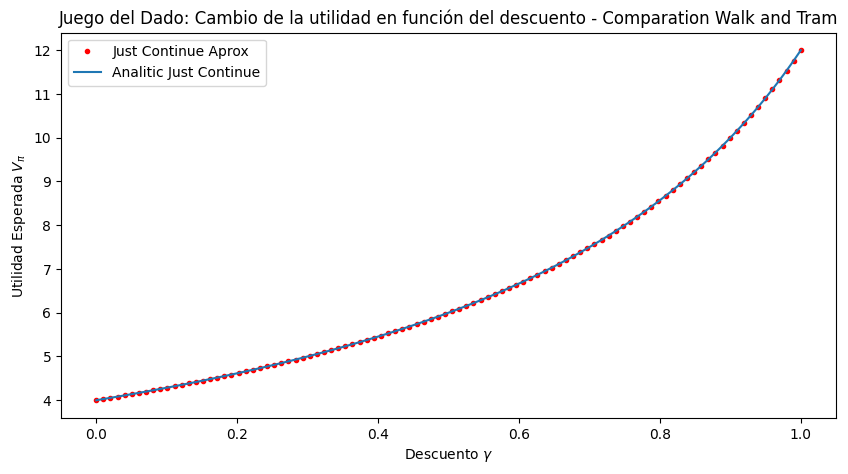

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(gamma, just_continue_aprox, '.r' , label = 'Just Continue Aprox')
plt.plot(gamma, analitic_justcontinue,label = 'Analitic Just Continue')
plt.xlabel('Descuento $\gamma$')
plt.ylabel('Utilidad Esperada $V_{\pi}$')
plt.title('Juego del Dado: Cambio de la utilidad en función del descuento - Comparation Walk and Tram')
plt.legend()
plt.show()

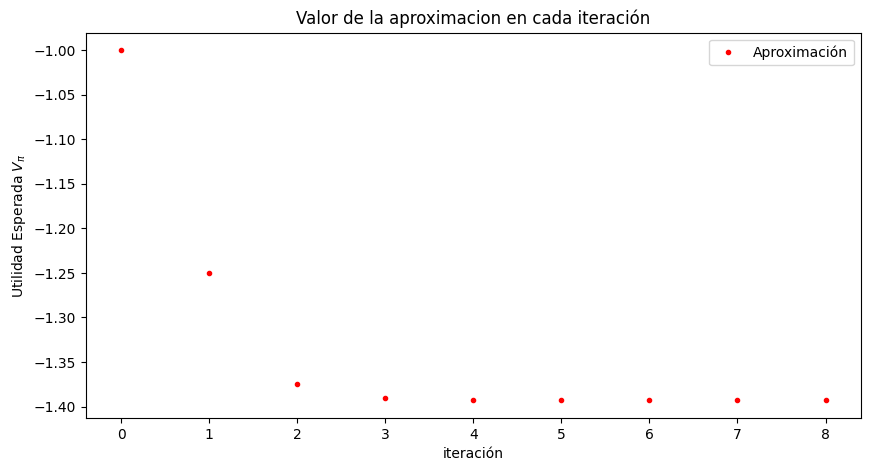

In [143]:
history=None
plt.figure(figsize=(10, 5))
plt.plot(list(range(0,9)), history, 'r.',label = 'Aproximación')
plt.xlabel('iteración')
plt.ylabel('Utilidad Esperada $V_{\pi}$')
plt.title('Valor de la aproximacion en cada iteración')
plt.legend()
plt.show()